In [16]:
print("Attendence")

Attendence


In [6]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
img = cv.imread("images/test7.jpg")

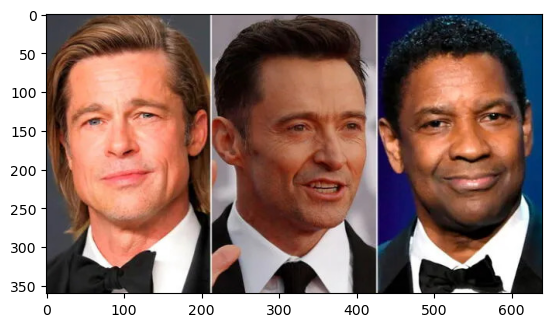

In [8]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb) 

In [9]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
faces = detector.detect_faces(img)

1/1 [==============================] - 0s 165ms/step


In [10]:
faces

[{'box': [457, 65, 163, 200],
  'confidence': 0.9999803304672241,
  'keypoints': {'left_eye': (503, 145),
   'right_eye': (580, 138),
   'nose': (549, 180),
   'mouth_left': (513, 217),
   'mouth_right': (587, 212)}},
 {'box': [261, 68, 156, 205],
  'confidence': 0.999497652053833,
  'keypoints': {'left_eye': (325, 148),
   'right_eye': (393, 147),
   'nose': (372, 187),
   'mouth_left': (328, 221),
   'mouth_right': (392, 222)}},
 {'box': [30, 57, 149, 199],
  'confidence': 0.9964638352394104,
  'keypoints': {'left_eye': (62, 139),
   'right_eye': (129, 131),
   'nose': (91, 173),
   'mouth_left': (73, 213),
   'mouth_right': (134, 205)}}]

In [11]:
for result in faces:
    x, y, w, h = result['box']
    img_rgb = cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 10)

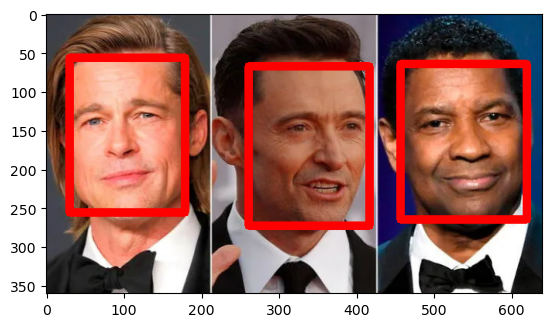

In [12]:
plt.imshow(img_rgb)
plt.show()

In [13]:
cropped_faces=[]

In [14]:
for result in faces:
    x, y, w, h = result['box']
    img_rgb = cv.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 10)
    face_img = img_rgb[y:y+h, x:x+w]  # Extract the face region
    cropped_faces.append(face_img)

In [15]:
print(len(cropped_faces))

3


In [16]:
print(cropped_faces)

[array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]

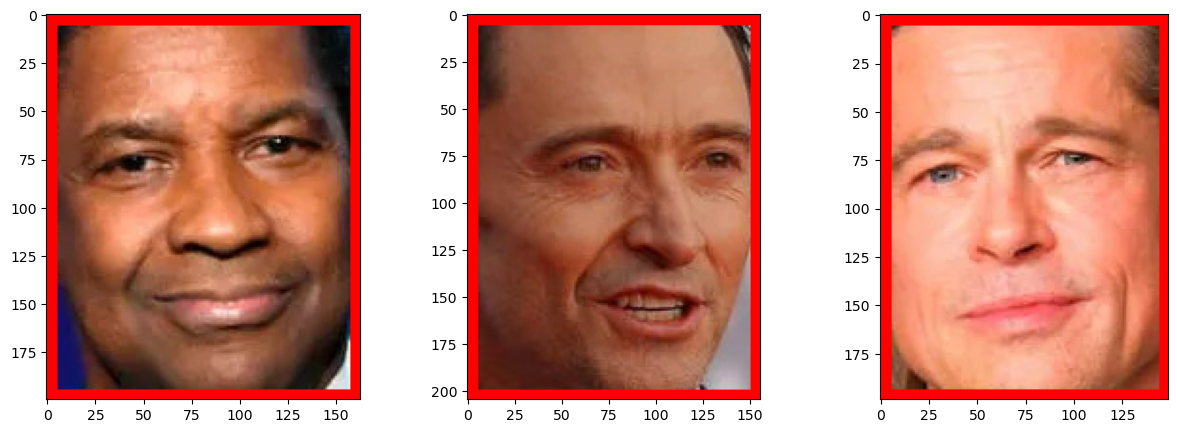

In [17]:
plt.figure(figsize=(15, 5))
for i, face_img in enumerate(cropped_faces):
    plt.subplot(1, len(cropped_faces), i+1)
    plt.imshow(face_img)
    plt.axis('on')
plt.show()

In [4]:
################For creating train test and val folder#####################


import os
import random
from shutil import copyfile
from sklearn.model_selection import train_test_split

# Define paths to dataset folders
dataset_folder = "test_dataset"  # Path to the root folder containing class folders
class_folders = os.listdir(dataset_folder)  # List of class folder names

# Initialize lists to store image paths and labels
image_paths = []
labels = []

# Loop through class folders and collect image paths and labels
for class_folder in class_folders:
    class_label = class_folder  # Assuming class folder names are the labels
    class_folder_path = os.path.join(dataset_folder, class_folder)
    class_image_paths = [os.path.join(class_folder_path, image) for image in os.listdir(class_folder_path) if image.endswith('.jpg')]
    image_paths.extend(class_image_paths)
    labels.extend([class_label] * len(class_image_paths))

# Shuffle the data
combined = list(zip(image_paths, labels))
random.shuffle(combined)
image_paths[:], labels[:] = zip(*combined)

# Split dataset into train, validation, and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(image_paths, labels, test_size=1 - train_ratio, random_state=42)
val_image_paths, test_image_paths, val_labels, test_labels = train_test_split(test_image_paths, test_labels, test_size=test_ratio/(test_ratio + val_ratio), random_state=42)

# Define paths for train, validation, and test sets
train_folder = "dataset/train"
val_folder = "dataset/val"
test_folder = "dataset/test"

# Copy images to train folder
for image_path, label in zip(train_image_paths, train_labels):
    dest_folder = os.path.join(train_folder, label)
    os.makedirs(dest_folder, exist_ok=True)
    image_name = os.path.basename(image_path)
    copyfile(image_path, os.path.join(dest_folder, image_name))

# Copy images to validation folder
for image_path, label in zip(val_image_paths, val_labels):
    dest_folder = os.path.join(val_folder, label)
    os.makedirs(dest_folder, exist_ok=True)
    image_name = os.path.basename(image_path)
    copyfile(image_path, os.path.join(dest_folder, image_name))

# Copy images to test folder
for image_path, label in zip(test_image_paths, test_labels):
    dest_folder = os.path.join(test_folder, label)
    os.makedirs(dest_folder, exist_ok=True)
    image_name = os.path.basename(image_path)
    copyfile(image_path, os.path.join(dest_folder, image_name))


In [6]:
import tensorflow as tf

# Define the custom model architecture
model = tf.keras.Sequential([
    # MobileNetV2 backbone (pre-trained on ImageNet)
    tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(160, 160, 3)),
    # Additional layers for your specific prediction task
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data augmentation and preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Define data generators
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Evaluate the model
test_generator = val_datagen.flow_from_directory(
    'dataset/test',
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical'
)
test_loss, test_acc = model.evaluate(test_generator)

# Save the trained model
model.save('custom_celebFace_mobileNet_model.h5')


Found 320 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Epoch 1/20


10/10 [==============================] - 24s 754ms/step - loss: 0.8481 - accuracy: 0.6906 - val_loss: 5.5504 - val_accuracy: 0.4750
Epoch 2/20
10/10 [==============================] - 6s 553ms/step - loss: 0.4248 - accuracy: 0.8594 - val_loss: 5.8404 - val_accuracy: 0.5250
Epoch 3/20
10/10 [==============================] - 6s 563ms/step - loss: 0.5215 - accuracy: 0.8469 - val_loss: 4.6427 - val_accuracy: 0.5750
Epoch 4/20
10/10 [==============================] - 7s 710ms/step - loss: 0.2489 - accuracy: 0.9000 - val_loss: 7.3865 - val_accuracy: 0.3500
Epoch 5/20
10/10 [==============================] - 6s 607ms/step - loss: 0.1107 - accuracy: 0.9719 - val_loss: 10.4517 - val_accuracy: 0.3500
Epoch 6/20
10/10 [==============================] - 6s 613ms/step - loss: 0.1858 - accuracy: 0.9469 - val_loss: 5.9150 - val_accuracy: 0.3750
Epoch 7/20
10/10 [==============================] - 6s 583ms/st

d:\Python\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
import datetime
import pandas as pd
import tensorflow as tf
import cv2
from mtcnn.mtcnn import MTCNN

# Load the custom MobileNet model from the saved .h5 file
custom_model = tf.keras.models.load_model('custom_celebFace_mobileNet_model.h5')

# Define class labels
class_labels = ['Angelina Jolie', 'Brad Pitt', 'Denzel Washington', 'Hugh Jackman']

# Minimum confidence threshold for face recognition
MIN_CONFIDENCE = 0.7

# Function to perform face recognition on cropped faces
def recognize_faces(cropped_faces):
    attendance_data = []
    for face_img in cropped_faces:
        # Preprocess face image
        face_img = cv2.resize(face_img, (160, 160))  # Resize image
        face_img = face_img / 255.0  # Normalize pixel values
        face_img = tf.expand_dims(face_img, axis=0)  # Expand dimensions
        predictions = custom_model.predict(face_img)  # Perform inference
        # Get predicted class index and confidence
        predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
        confidence = predictions[0][predicted_class_index]
        # Check if confidence is above threshold
        if confidence >= MIN_CONFIDENCE:
            predicted_label = class_labels[predicted_class_index]
            timestamp = datetime.datetime.now()
            attendance_data.append({'Name': predicted_label, 'Timestamp': timestamp, 'Accuracy':"{:.2f}".format(confidence)})
    return attendance_data

# Function to preprocess input image
def preprocess_image(image_path,target_size=(160, 160)):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image. Please check if the file path is correct.")
        return []

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detector = MTCNN()
    faces = detector.detect_faces(img)

    cropped_faces = []
    for result in faces:
        x, y, w, h = result['box']
        face_img = img_rgb[y:y+h, x:x+w]  # Extract the face region
        face_img = cv2.resize(face_img, target_size)
        cropped_faces.append(face_img)

    return cropped_faces

# Example usage
image_path = "images/test7.jpg"
cropped_faces = preprocess_image(image_path)
attendance_data = recognize_faces(cropped_faces)

# Convert data to Pandas DataFrame
df = pd.DataFrame(attendance_data)

# Write data to Excel sheet
df.to_excel('attendance.xlsx', index=False)

for i, data in enumerate(attendance_data):
    print(f"Face {i+1}:")
    print(f"Name: {data['Name']}")
    print(f"Accuracy: {data['Accuracy']}")
    print(f"Timestamp: {data['Timestamp']}")
    print()


plt.figure(figsize=(15, 5))
for i, face_img in enumerate(cropped_faces):
    plt.subplot(1, len(cropped_faces), i+1)
    plt.imshow(face_img)
    plt.axis('on')
plt.show()

In [ ]:
print(cropped_faces)

In [ ]:
print(faces)